In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix
import shutil
import numpy as np

C:\Users\victo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
batch_size = 32
image_size = (224, 224)   

In [3]:
#Código para leer las imágenes: Data set de entrenamiento
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                'Ruta/Train_Val',     #Directorio donde se encuentran
                labels='inferred',                      #Para tomar cada subdirectorio como una clase diferente
                label_mode='int',                       #Las etiquetas son numeros enteros
                validation_split=0.1,                   #90% datos entrenamiento, 10% validación
                subset="training",                      #Asignamos que este data set es de entrenamiento
                seed=20220331,                          #Variable relacionada con la aleatoriedad
                image_size=image_size,                  #Tamaño de las imágenes
                batch_size=batch_size,                  #Tamaño de los lotes de entrenamiento
            )

Found 630 files belonging to 9 classes.
Using 567 files for training.


In [4]:
#Código para leer las imágenes: Data set de validación
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                'Ruta/Train_Val',
                labels='inferred',
                label_mode='int',
                validation_split=0.1,
                subset="validation",
                seed=20220331,
                image_size=image_size,
                batch_size=batch_size,
            )

Found 630 files belonging to 9 classes.
Using 63 files for validation.


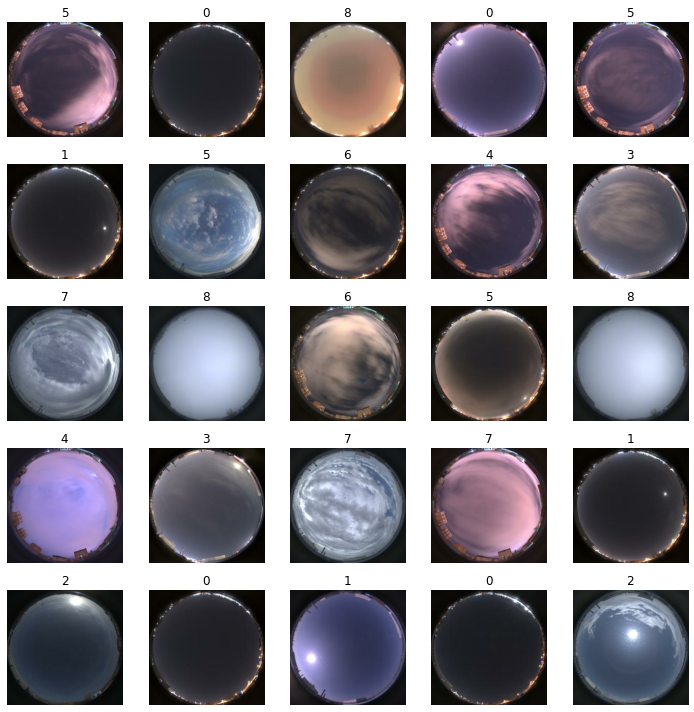

In [5]:
# Obtener un lote de datos de validación
for imagenes, etiquetas in train_ds.take(1):
    # Crear una nueva figura
    plt.figure(figsize=(10, 10))

    # Iterar sobre las primeras 25 imágenes y etiquetas en el lote
    for i in range(25):
        # Obtener la imagen y la etiqueta correspondiente
        imagen = imagenes[i]
        etiqueta = etiquetas[i]

        # Convertir la etiqueta a una cadena si es necesario
        etiqueta = str(etiqueta.numpy()) if isinstance(etiqueta, tf.Tensor) else str(etiqueta)

        # Añadir una subparcela a la figura
        plt.subplot(5, 5, i + 1)
        plt.imshow(imagen.numpy().astype("uint8"))  # Mostrar la imagen como una matriz numpy
        plt.title(etiqueta)                         # Mostrar la etiqueta como título
        plt.axis("off")                             # Desactivar ejes

    # Ajustar el diseño y mostrar la figura
    plt.tight_layout()
    plt.show()

In [6]:
#funciones de perdida
#categorical cross entropy
loss=tf.losses.SparseCategoricalCrossentropy() 
"""
loss='mae' #num_classes = 1
loss='mse' #num_classes = 1
"""

"\nloss='mae' #num_classes = 1\nloss='mse' #num_classes = 1\n"

In [7]:
#Numero clases:
num_classes = 9

In [8]:
# Definición del modelo
model = tf.keras.Sequential([
    # Capa convolucional 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Capa convolucional 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Capa convolucional 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Capa convolucional 4
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Capa de aplanamiento para conectar con las capas densas
    tf.keras.layers.Flatten(),
    # Primera capa densa
    tf.keras.layers.Dense(512, activation='relu'),
    # Capa de salida
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Num_classes es el número de clases de salida
])

C:\Users\victo\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#optimizers
#Descenso del gradiente
#lr_schedule = 0.05
#optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
#Optimizador adam
optimizer ='adam'

In [10]:
# Directorio donde se guarda el modelo
copia_modelo = 'modelos/BACKUP_2_copia.keras'

In [11]:
#compilar
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [12]:
#PARA OTRAS FUNCIONES (CALLBACKS)

# Para otros callbacks
# Guarda el último modelo con el mejor ajuste en val_ts
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    copia_modelo,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto"
)
shutil.rmtree('Ruta/log.txt') 
os.makedirs('Ruta/log.txt')
# Guarda la información de cada época, residuos, etc.
csv_logger = tf.keras.callbacks.CSVLogger(
    'log.txt',
    append=True,
    separator=','
)

In [13]:
#TE PARA LAS EPOCAS SI NO MEJORA EN 10 EPOCAS, y TE REDUCE LA LR SI NO MEJORA EN 5
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

In [14]:
#ENTRENAR MODELO:
data_trainining = (train_ds)
model.fit(
    data_trainining,
    validation_data=val_ds,
    shuffle=True,
    epochs=300,
    callbacks=[checkpoint,early_stopping, reduce_lr,csv_logger],
)

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1424 - loss: 33.2537
Epoch 1: val_loss improved from inf to 1.98676, saving model to modelos/BACKUP_2_copia.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1442 - loss: 32.3378 - val_accuracy: 0.1746 - val_loss: 1.9868 - learning_rate: 0.0010
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3148 - loss: 1.8763
Epoch 2: val_loss improved from 1.98676 to 1.75685, saving model to modelos/BACKUP_2_copia.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.3157 - loss: 1.8732 - val_accuracy: 0.2698 - val_loss: 1.7569 - learning_rate: 0.0010
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3864 - loss: 1.6323
Epoch 3: val_loss improved from 1.75685 to 1.46099, saving model to modelos/BACKUP_2_copia.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3882 - loss: 1.6265 - val_accuracy: 0.4127 - val_loss: 1.4610 - learning_rate: 0.0010
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [15]:
# Carga el modelo guardado
modelo = tf.keras.models.load_model(copia_modelo)
# Muestra un resumen del modelo
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,049,437 (110.81 MB)

 Trainable params: 9,683,145 (36.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,366,292 (73.88 MB)

In [16]:
#Cargamos el data set Test:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
                'Ruta/Test',  # Directorio donde se encuentran los datos de prueba
                labels='inferred',                      # Para tomar cada subdirectorio como una clase diferente
                label_mode='int',                       # Las etiquetas son números enteros
                seed=20220331,                          # Variable relacionada con la aleatoriedad
                image_size=image_size,                  # Tamaño de las imágenes
                batch_size=batch_size,                  # Tamaño de los lotes de prueba
            )

Found 2565 files belonging to 9 classes.


In [17]:
# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_accuracy = model.evaluate(test_ds)

# Imprimir la precisión en el conjunto de datos de prueba
print("Precisión en el conjunto de datos de prueba:", test_accuracy)

81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 338ms/step - accuracy: 0.8084 - loss: 0.6895
Precisión en el conjunto de datos de prueba: 0.8007797002792358


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

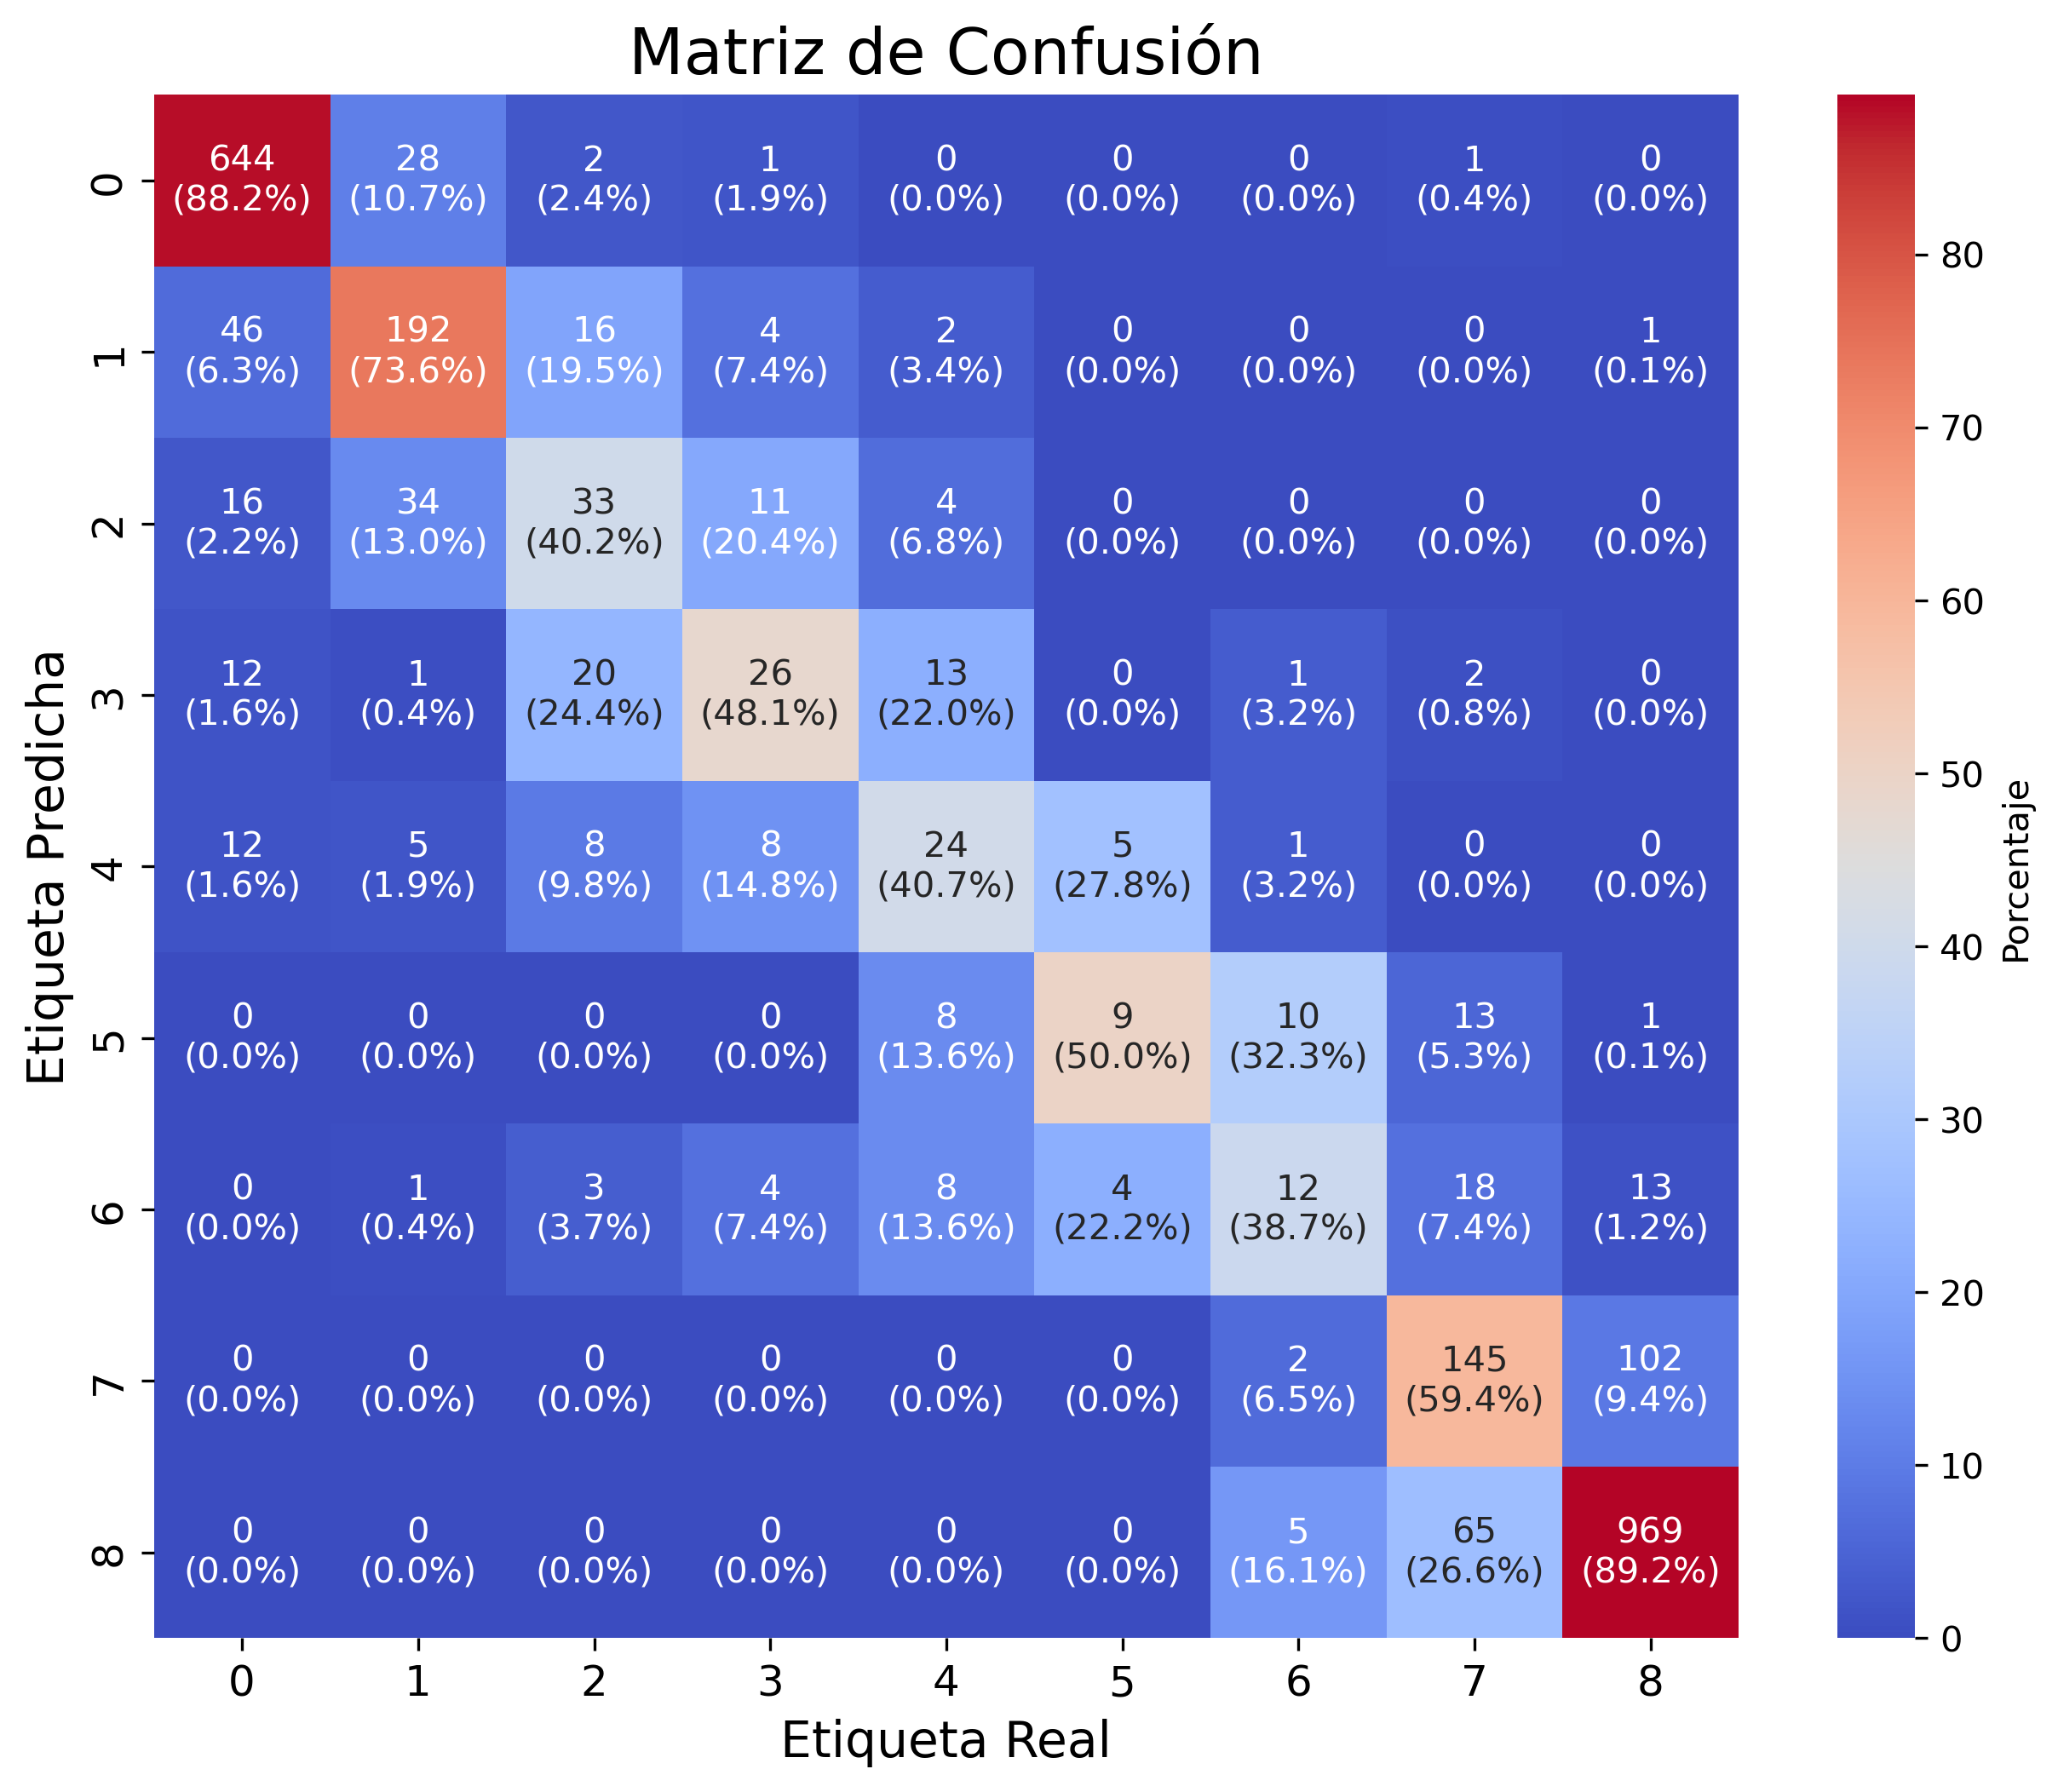

In [18]:
# Obtener la matriz de confusión
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    true_labels.extend(labels.numpy())
    predicted_labels.extend(np.argmax(model.predict(images), axis=-1))

conf_matrix = confusion_matrix(predicted_labels, true_labels)

# Calcular el porcentaje de imágenes en cada cuadrado de la matriz de confusión
total_per_class = np.sum(conf_matrix, axis=0)  # Total de imágenes por clase
conf_matrix_percentage = conf_matrix / total_per_class[np.newaxis, :] * 100

# Crear una matriz de strings con el número de imágenes y el porcentaje
conf_matrix_labels = np.empty(conf_matrix.shape, dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        conf_matrix_labels[i, j] = f'{conf_matrix[i, j]}\n({conf_matrix_percentage[i, j]:.1f}%)'

# Visualizar la matriz de confusión con porcentajes y números de imágenes
plt.figure(figsize=(10, 8), dpi=300)  # Aumentar el dpi para mejorar la resolución
sns.heatmap(conf_matrix_percentage, annot=conf_matrix_labels, fmt='', cmap='coolwarm', cbar=True, cbar_kws={'label': 'Porcentaje'})
plt.xlabel('Etiqueta Real', fontsize=14)
plt.ylabel('Etiqueta Predicha', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Matriz de Confusión', fontsize=18)
plt.savefig('Ruta/Matriz_densidad.jpg', bbox_inches='tight', dpi=300)  # Guardar con mayor dpi
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

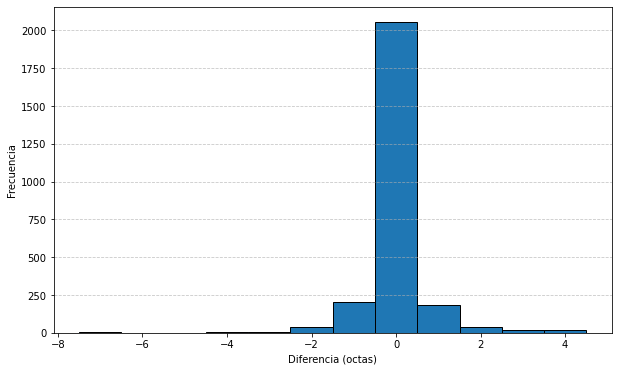

In [19]:
# Inicializar las listas para etiquetas verdaderas y predichas
true_labels = []
predicted_labels = []

# Iterar sobre el dataset de prueba para obtener las etiquetas y predicciones
for images, labels in test_ds:
    true_labels.extend(labels.numpy())  # Convertir las etiquetas a un array de numpy y añadirlas a true_labels
    predictions = model.predict(images)  # Obtener las predicciones del modelo
    predicted_labels.extend(np.argmax(predictions, axis=-1))  # Obtener el índice de la clase predicha y añadirlo a predicted_labels

# Convertir las listas a arrays de numpy
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calcular las diferencias
differences = predicted_labels - true_labels

# Crear un histograma de las diferencias
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=range(int(np.min(differences)), int(np.max(differences)) + 1), edgecolor='black', align='left')
plt.xlabel('Diferencia (octas)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Ruta/histograma_diferencias.png')
plt.show()

In [20]:
import scipy
#algunos valores estadísticos descriptivos
# Media (Promedio)
print(f"La media es: ",np.mean(differences))

# Mediana
print(f"La mediana es: {np.median(differences):.10f}")

# Moda
print(f"La moda es: {scipy.stats.mode(differences)[0][0]}")

# Varianza
print(f"La varianza es: ",np.var(differences))

# Desviación estándar
print(f"La desviación estandar es: ",np.std(differences))

# Rango
print(f"El rango es: ",np.std(differences))

#Asimetria:
print(f"La asimetría de la distribución es", scipy.stats.skew(differences))

La media es:  0.030019493177387915
La mediana es: 0.0000000000
La moda es: 0
La varianza es:  0.5133288495225501
La desviación estandar es:  0.7164697129136375
El rango es:  0.7164697129136375
La asimetría de la distribución es 0.610951392636848


In [21]:
# Precision con mas menos un fallo en octas
test_loss, test_accuracy = model.evaluate(test_ds)

# Obtener las etiquetas verdaderas y las predicciones del modelo
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    true_labels.extend(labels.numpy())  # Convertir las etiquetas a un array de numpy y añadirlas a true_labels
    predictions = model.predict(images)  # Obtener las predicciones del modelo
    predicted_labels.extend(np.argmax(predictions, axis=-1))  # Obtener el índice de la clase predicha y añadirlo a predicted_labels

# Convertir las listas a arrays de numpy
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calcular la precisión contando como acierto si la predicción está dentro de un rango de ±1 alrededor de la etiqueta verdadera
aciertos = np.sum((predicted_labels == true_labels) |
                  (predicted_labels == true_labels + 1) |
                  (predicted_labels == true_labels - 1))

precision_con_rango = aciertos / len(true_labels)

# Imprimir la precisión con el rango de ±1
print("Precisión en el conjunto de datos de prueba (incluyendo ±1):", precision_con_rango)

81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 287ms/step - accuracy: 0.8071 - loss: 0.7023
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

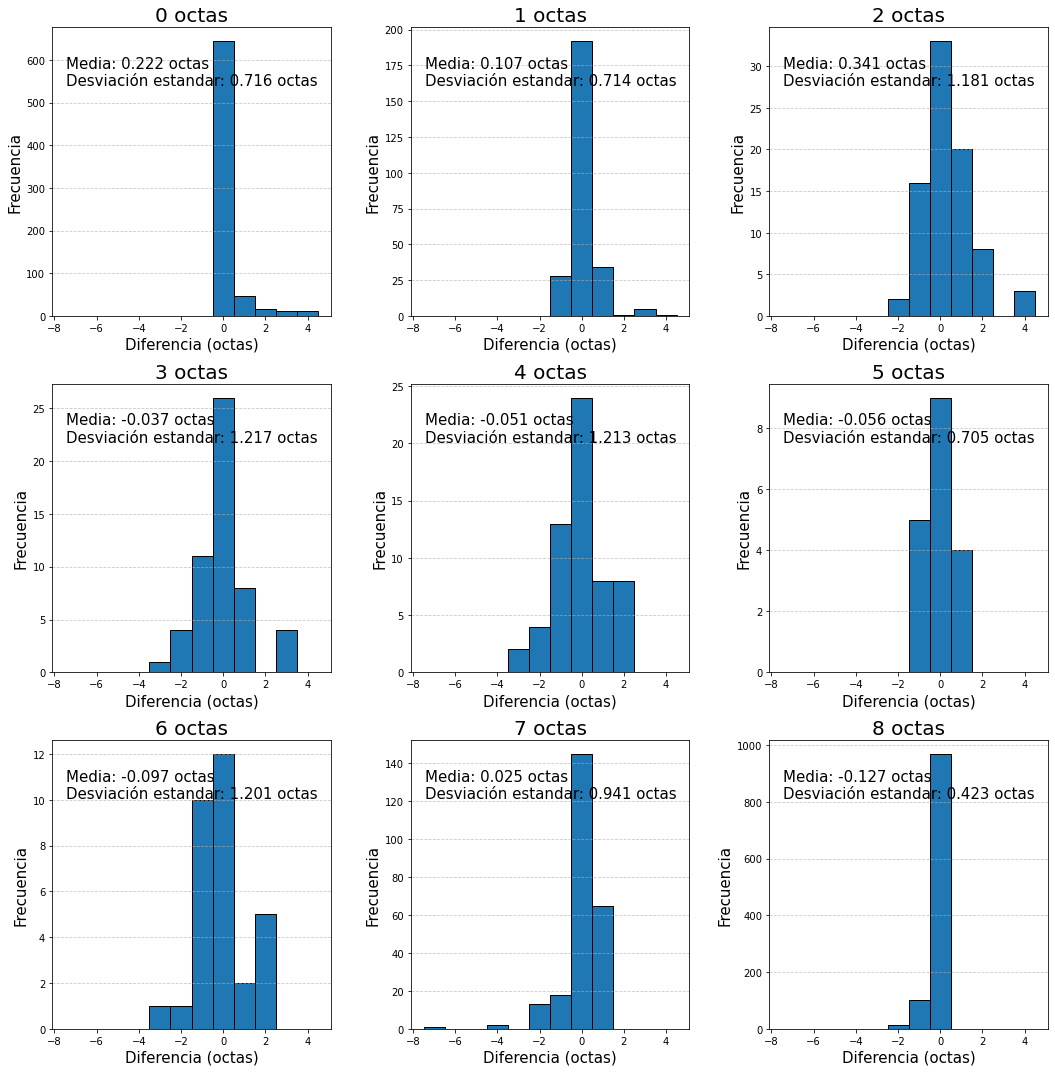

In [22]:
# Obtener las etiquetas verdaderas y las predicciones del modelo
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    true_labels.extend(labels.numpy())  # Convertir las etiquetas a un array de numpy y añadirlas a true_labels
    predictions = model.predict(images)  # Obtener las predicciones del modelo
    predicted_labels.extend(np.argmax(predictions, axis=-1))  # Obtener el índice de la clase predicha y añadirlo a predicted_labels

# Convertir las listas a arrays de numpy
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calcular las diferencias entre las etiquetas verdaderas y las predicciones
differences =predicted_labels - true_labels

# Obtener las etiquetas únicas
unique_labels = np.unique(true_labels)

# Crear un subplot para cada etiqueta
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterar sobre cada etiqueta única
for i, label in enumerate(unique_labels):
    # Seleccionar solo las diferencias para la etiqueta actual
    label_differences = differences[true_labels == label]
    
    # Obtener el subplot correspondiente
    ax = axes[i // 3, i % 3]
    
    # Crear el histograma para la etiqueta actual
    ax.hist(label_differences, bins=range(int(np.min(differences)), int(np.max(differences)) + 1), edgecolor='black', align='left')
    ax.set_title(f'{label} octas', fontsize=20)
    ax.set_xlabel('Diferencia (octas)', fontsize=15)
    ax.set_ylabel('Frecuencia', fontsize=15)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Calcular la media, mediana y varianza
    mean = np.mean(label_differences)
    des = np.std(label_differences)
    
    # Agregar texto con la media, mediana y varianza al gráfico
    ax.text(0.05, 0.9, f'Media: {mean:.3f} octas \nDesviación estandar: {des:.3f} octas', transform=ax.transAxes, fontsize=15, verticalalignment='top')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Guardar la figura
plt.savefig('Ruta/histogramas_por_octa.png', dpi=300)

# Mostrar los histogramas
plt.show()